Decision Tree Performance for Scale Claim Cost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       311
         Low       0.85      0.98      0.91     19877
      Medium       0.55      0.60      0.58      1279
   Very High       0.00      0.00      0.00        96
    Very Low       0.57      0.10      0.17      3110

    accuracy                           0.83     24673
   macro avg       0.40      0.34      0.33     24673
weighted avg       0.79      0.83      0.79     24673

Accuracy: 0.8315567624528837


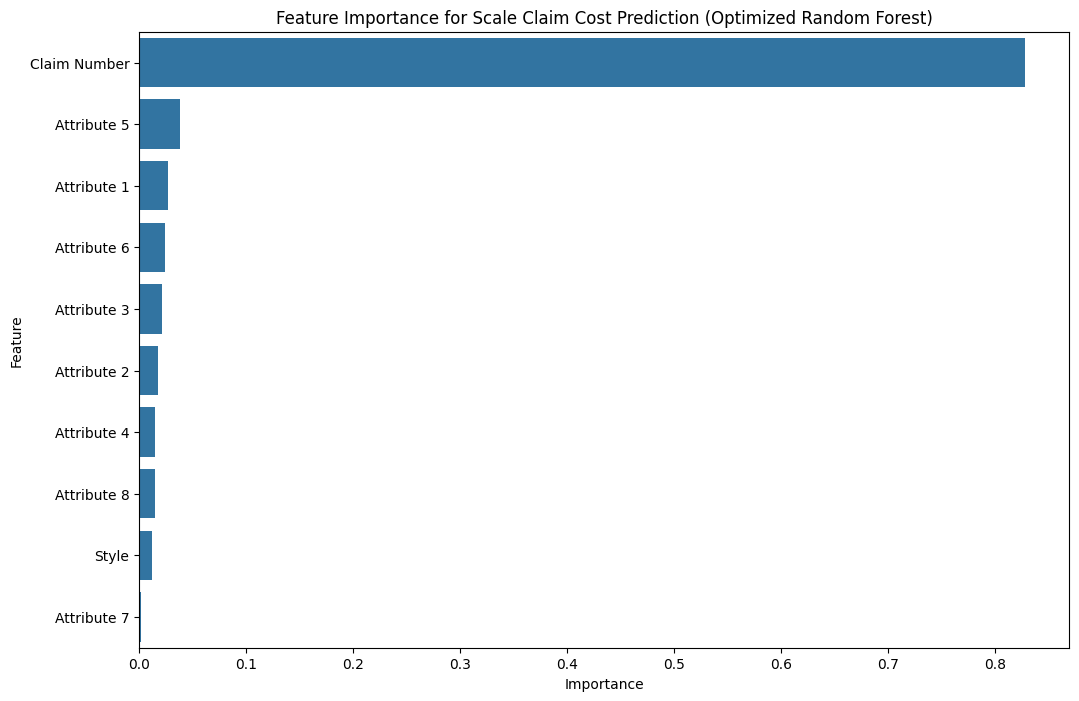

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the datasets
option_code = pd.read_csv('/content/Option Code Information file for UNT - Final(Sheet1).csv')
claim_info = pd.read_csv('/content/Claim Information file for UNT(Sheet1).csv')

# Merge datasets
merged_df = pd.merge(option_code, claim_info, left_on='Truck', right_on='Truck Number')
merged_df = merged_df.drop(columns=['Truck Number'])

# Define target and features
target_claim_cost = merged_df['Scale Claim Cost']
target_labor_cost = merged_df['Scale Labor Cost']
features = merged_df.drop(columns=['Scale Claim Cost', 'Scale Labor Cost', 'Truck'])

# Label Encoding for categorical columns (instead of One-Hot Encoding)
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])

# Split the data into training and test sets
X_train, X_test, y_train_claim, y_test_claim = train_test_split(features, target_claim_cost, test_size=0.2, random_state=42)
_, _, y_train_labor, y_test_labor = train_test_split(features, target_labor_cost, test_size=0.2, random_state=42)

# Decision Tree model for initial comparison
tree_claim = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_claim.fit(X_train, y_train_claim)

# Random Forest with fewer estimators and limited max depth
forest_claim = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduced n_estimators
forest_claim.fit(X_train, y_train_claim)

# Predictions and evaluation
y_pred_tree_claim = tree_claim.predict(X_test)
y_pred_forest_claim = forest_claim.predict(X_test)

# Print performance of Decision Tree model
print("Decision Tree Performance for Scale Claim Cost")
print(classification_report(y_test_claim, y_pred_tree_claim))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_tree_claim))

# Feature importance plot for Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = forest_claim.feature_importances_
features_list = X_train.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Scale Claim Cost Prediction (Optimized Random Forest)")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters from GridSearchCV:
{'class_weight': None, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Model Performance (After Tuning):
              precision    recall  f1-score   support

        High       0.76      0.61      0.67       311
         Low       0.87      0.98      0.92     19877
      Medium       0.72      0.62      0.67      1279
   Very High       0.88      0.75      0.81        96
    Very Low       0.77      0.21      0.33      3110

    accuracy                           0.86     24673
   macro avg       0.80      0.63      0.68     24673
weighted avg       0.85      0.86      0.83     24673

Accuracy: 0.8571312771045272


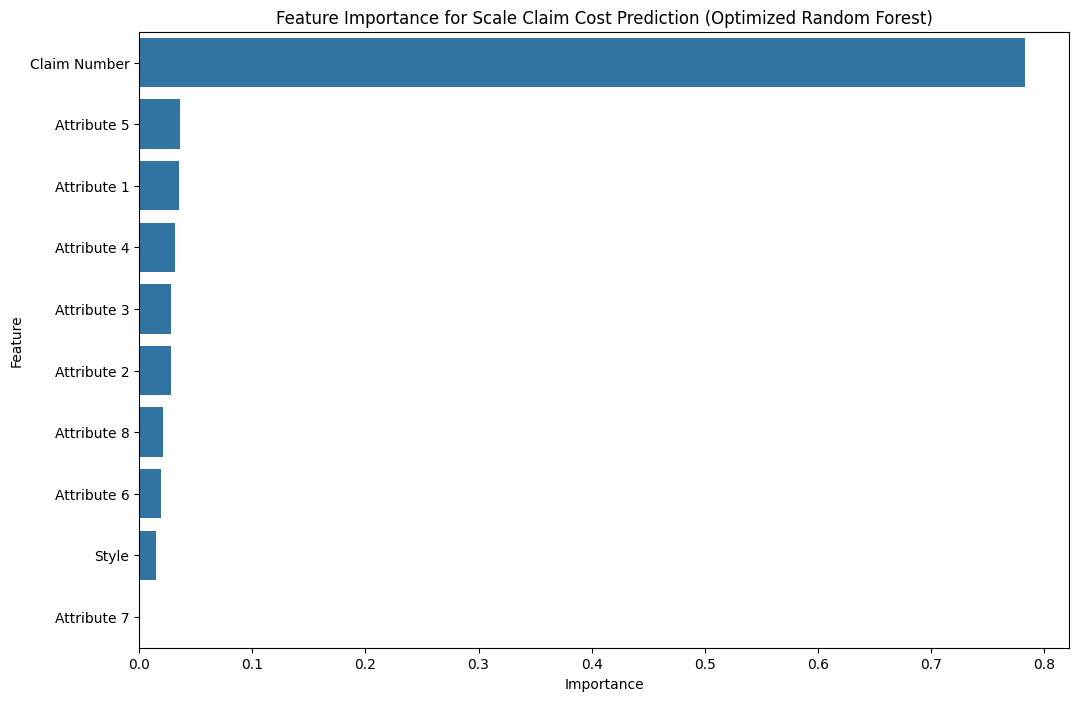

Decision Tree Performance for Scale Claim Cost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       311
         Low       0.85      0.98      0.91     19877
      Medium       0.55      0.60      0.58      1279
   Very High       0.00      0.00      0.00        96
    Very Low       0.57      0.10      0.17      3110

    accuracy                           0.83     24673
   macro avg       0.40      0.34      0.33     24673
weighted avg       0.79      0.83      0.79     24673

Accuracy: 0.8315567624528837


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
option_code = pd.read_csv('/content/Option Code Information file for UNT - Final(Sheet1).csv')
claim_info = pd.read_csv('/content/Claim Information file for UNT(Sheet1).csv')

# Merge datasets
merged_df = pd.merge(option_code, claim_info, left_on='Truck', right_on='Truck Number')
merged_df = merged_df.drop(columns=['Truck Number'])

# Define target and features
target_claim_cost = merged_df['Scale Claim Cost']
target_labor_cost = merged_df['Scale Labor Cost']
features = merged_df.drop(columns=['Scale Claim Cost', 'Scale Labor Cost', 'Truck'])

# Label Encoding for categorical columns (instead of One-Hot Encoding)
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])

# Split the data into training and test sets
X_train, X_test, y_train_claim, y_test_claim = train_test_split(features, target_claim_cost, test_size=0.2, random_state=42)
_, _, y_train_labor, y_test_labor = train_test_split(features, target_labor_cost, test_size=0.2, random_state=42)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]  # Adjust class weights for imbalanced data
}

# Initialize the RandomForestClassifier
forest_claim = RandomForestClassifier(random_state=42)

# Apply GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=forest_claim, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_train, y_train_claim)

# Print the best parameters from GridSearchCV
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_forest_claim = grid_search.best_estimator_

# Train the model with the best parameters
best_forest_claim.fit(X_train, y_train_claim)

# Predictions on the test set
y_pred_forest_claim = best_forest_claim.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance (After Tuning):")
print(classification_report(y_test_claim, y_pred_forest_claim))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_forest_claim))

# Feature importance plot for Random Forest
feature_importances = best_forest_claim.feature_importances_
features_list = X_train.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Scale Claim Cost Prediction (Optimized Random Forest)")
plt.show()

# Decision Tree model for comparison (as per original code)
tree_claim = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_claim.fit(X_train, y_train_claim)

# Predictions and evaluation for Decision Tree
y_pred_tree_claim = tree_claim.predict(X_test)
print("Decision Tree Performance for Scale Claim Cost")
print(classification_report(y_test_claim, y_pred_tree_claim))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_tree_claim))


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV

# Load the datasets
option_code = pd.read_csv('/content/Option Code Information file for UNT - Final(Sheet1).csv')
claim_info = pd.read_csv('/content/Claim Information file for UNT(Sheet1).csv')

# Merge datasets
merged_df = pd.merge(option_code, claim_info, left_on='Truck', right_on='Truck Number')
merged_df = merged_df.drop(columns=['Truck Number'])

# Define target and features
target_claim_cost = merged_df['Scale Claim Cost']
target_labor_cost = merged_df['Scale Labor Cost']
features = merged_df.drop(columns=['Scale Claim Cost', 'Scale Labor Cost', 'Truck'])

# Label Encoding for categorical columns (instead of One-Hot Encoding)
label_encoder = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])

# Split the data into training and test sets
X_train, X_test, y_train_claim, y_test_claim = train_test_split(features, target_claim_cost, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_claim)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]  # Adjust class weights for imbalanced data
}

# Initialize RandomForest and SVM with class weight
forest_claim = RandomForestClassifier(random_state=42)
svm_claim = SVC(probability=True, class_weight='balanced', random_state=42)

# Apply GridSearchCV for Random Forest and SVM
grid_search_forest = GridSearchCV(estimator=forest_claim, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_forest.fit(X_train_res, y_train_res)
best_forest_claim = grid_search_forest.best_estimator_

# Tune hyperparameters for GradientBoosting
param_grid_gb = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
}
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_gb.fit(X_train_res, y_train_res)
best_gb_claim = grid_search_gb.best_estimator_

# Calibrate models to improve probabilities for threshold tuning
calibrated_forest = CalibratedClassifierCV(best_forest_claim, method='sigmoid', cv='prefit')
calibrated_forest.fit(X_train_res, y_train_res)

calibrated_gb = CalibratedClassifierCV(best_gb_claim, method='sigmoid', cv='prefit')
calibrated_gb.fit(X_train_res, y_train_res)

# Combine the models in an ensemble (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[
    ('rf', calibrated_forest),
    ('gb', calibrated_gb),
    ('svm', svm_claim)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_res, y_train_res)

# Make predictions using the ensemble model
y_pred_claim = ensemble_model.predict(X_test)

# Evaluate the model
print("Ensemble Model Performance:")
print(classification_report(y_test_claim, y_pred_claim))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_claim))

# Feature importance plot for Random Forest
feature_importances = best_forest_claim.feature_importances_
features_list = X_train.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Scale Claim Cost Prediction")
plt.show()

# Decision Tree model for comparison (as per original code)
tree_claim = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_claim.fit(X_train, y_train_claim)

# Predictions and evaluation for Decision Tree
y_pred_tree_claim = tree_claim.predict(X_test)
print("Decision Tree Performance for Scale Claim Cost")
print(classification_report(y_test_claim, y_pred_tree_claim))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_tree_claim))

# Lower the decision threshold for recall improvement
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_adjusted = (y_pred_proba > 0.3).astype(int)  # Adjust threshold to 0.3

# Evaluate with new threshold
print("Adjusted Threshold Performance:")
print(classification_report(y_test_claim, y_pred_adjusted))
print("Accuracy:", accuracy_score(y_test_claim, y_pred_adjusted))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
